In [1]:
# %load "../bld/project_paths.py"
"""Define a dictionary *project_paths* with path
definitions for the entire project.

This module is automatically generated by Waf, never change it!

If paths need adjustment, change them in the root wscript file.

"""

import os
import re


project_paths = {}
project_paths['BLD'] = r'/home/tm/sciebo/uni-master/master-thesis/surrogate'
project_paths['IN_DATA'] = r'/home/tm/sciebo/uni-master/master-thesis/surrogate/src/original_data'
project_paths['IN_MODEL_CODE'] = r'/home/tm/sciebo/uni-master/master-thesis/surrogate/src/model_code'
project_paths['IN_MODEL_SPECS'] = r'/home/tm/sciebo/uni-master/master-thesis/surrogate/src/model_specs'
project_paths['LIBRARY'] = r'/home/tm/sciebo/uni-master/master-thesis/surrogate/src/library'
project_paths['OUT_ANALYSIS'] = r'/home/tm/sciebo/uni-master/master-thesis/surrogate/bld/out/analysis'
project_paths['OUT_DATA'] = r'/home/tm/sciebo/uni-master/master-thesis/surrogate/bld/out/data'
project_paths['OUT_FIGURES'] = r'/home/tm/sciebo/uni-master/master-thesis/surrogate/bld/out/figures'
project_paths['OUT_FINAL'] = r'/home/tm/sciebo/uni-master/master-thesis/surrogate/bld/out/final'
project_paths['OUT_TABLES'] = r'/home/tm/sciebo/uni-master/master-thesis/surrogate/bld/out/tables'
project_paths['PROJECT_ROOT'] = r'/home/tm/sciebo/uni-master/master-thesis/surrogate'
project_paths['TEST_DATA'] = r'/home/tm/sciebo/uni-master/master-thesis/surrogate/bld/out/data/test'
project_paths['TRAIN_DATA'] = r'/home/tm/sciebo/uni-master/master-thesis/surrogate/bld/out/data/train'


def project_paths_join(key, *args):
    """Given input of a *key* in the *project_paths* dictionary and a number
    of path arguments *args*, return the joined path constructed by:

    .. code-block:: python

            os.path.join(project_paths[key], *args)

    """

    return os.path.join(project_paths[key], *args)


def project_paths_join_latex(key, *args):
    """Given input of a *key* in the *project_paths* dictionary and a number
    of path arguments *args*, return the joined path constructed by::

            os.path.join(project_paths[key], *args)

    and backslashes replaced by forward slashes.

    """

    p = project_paths_join(key, *args)
    p = p.replace('\\', '/')
    p = re.sub('/+', '/', p)

    return p


ppj = project_paths_join

# Load Data

In [2]:
import numpy as np
import pickle

import os
os.chdir('..')

from data_management.utilities import extract_features_from_data, extract_outcome_from_data
from model_code.polynomialregression import PolynomialRegression

def load_training_data(nobs, seed):
    """Load data for testing and training.
    
    Args:
        nobs (int): The number of training observations.
            Has to be in the range [0, 75000].
        seed (int): Random number seed.
            
    Returns:
        X, y (np.array): Training features and Training outcomes.
    """
    df = pickle.load(open(ppj("OUT_DATA", "data_train.pkl"), 'rb'))
    
    np.random.seed(seed)
    index = np.random.choice(np.arange(75000), size=nobs, replace=False)

    df = df.iloc[index, :]

   
    X = extract_features_from_data(df)
    y = extract_outcome_from_data(df)

    return X, y

def load_testing_data(nobs=25000):
    """Load data for testing.
    
    Args:
        nobs (int): The number of testing observations.
            Has to be in the range [0, 25000].
            
    Returns:
        X, y (np.array): Testing features and testing outcomes.
    
    """
    dftest = pickle.load(open(ppj("OUT_DATA", "data_test.pkl"), 'rb'))
    dftest = dftest.iloc[:nobs, :]

    Xtest = extract_features_from_data(dftest)
    ytest = extract_outcome_from_data(dftest)
    
    return Xtest, ytest

In [16]:
def _plot_mae_polynomial_varying_sample_size(
        nobs,
        nsamples,
        seed
):
    """

    Args:
        nobs:
        nsamples:
        seed:

    Returns:

    """

In [3]:
pr = PolynomialRegression()

In [5]:
X, y = load_training_data(nobs=75000, seed=1)

In [11]:
pr.fit(X, y, degree=2)

In [12]:
Xtest, ytest = load_testing_data()

In [13]:
ypred = pr.predict(Xtest)

In [14]:
from sklearn.metrics import mean_absolute_error

In [15]:
mean_absolute_error(ytest, ypred)

0.005765184865397532

In [20]:
from itertools import count

In [21]:
seed=1; nsamples=5; nobs=[100, 1000, 5000]

In [23]:
def compute_testing_loss(model, ytest, Xtest, measure, **kwargs):
    ypred = model.predict(Xtest, **kwargs)
    mae = measure(ytest, ypred)
    return mae

In [29]:
counter = count(seed)

curves = np.empty((nsamples, len(nobs)))
for i in range(nsamples):
    for j, n in enumerate(nobs):
        X, y = load_training_data(nobs=n, seed=next(counter))
        pr = PolynomialRegression()
        pr.fit(X, y, degree=2)
        error = compute_testing_loss(
            model=pr,
            ytest=ytest,
            Xtest=Xtest,
            measure=mean_absolute_error
        )
        curves[i, j] = error

df = pd.DataFrame(curves, columns=nobs)

df_tidy = df.melt(var_name='n', value_name='mae')

# Polynomial Regression Varying Number of Observations

In [25]:
n_list = [100, 200, 500, 700, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 10000, 15000, 20000, 30000, 50000, 75000]

In [26]:
Xtest, ytest = load_testing_data()

In [27]:
seeds = list(range(25))

In [28]:
curves = []
for seed in seeds:
    mae_list = []
    for n in n_list:
        X, y = load_training_data(nobs=n, seed=seed)
        pr = PolynomialRegression()
        pr.fit(X, y, degree=2)
        error = np.abs(ytest - pr.predict(Xtest)).mean()
        mae_list.append(error)
    curves.append(mae_list)

In [29]:
import pandas as pd
df = pd.DataFrame(curves, columns=n_list)

In [30]:
import matplotlib.pyplot as plt

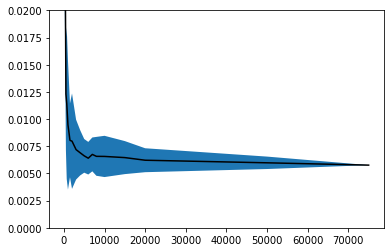

In [126]:
plt.plot(n_list, df.mean(), 'k-')
plt.ylim((0.000, 0.02))
plt.fill_between(n_list, df.mean() - 2 * sd, df.mean() + 2 * sd)

In [48]:
dfff = dff.copy()
dfff['delta_year_schooling'] = dfff['mae'] * 365

In [31]:
import seaborn as sns; sns.set()

(0.005, 0.01)

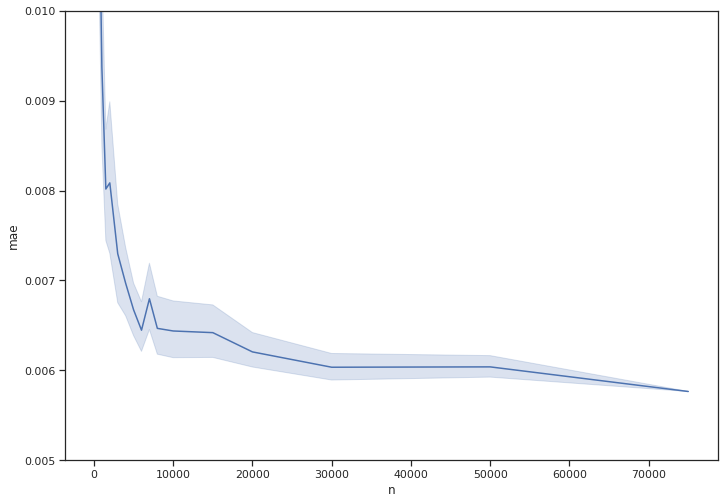

In [45]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
ax = sns.lineplot(x="n", y="mae", data=dff, ax=ax)
ax.set_ylim(0.005, 0.01)

(2, 4)

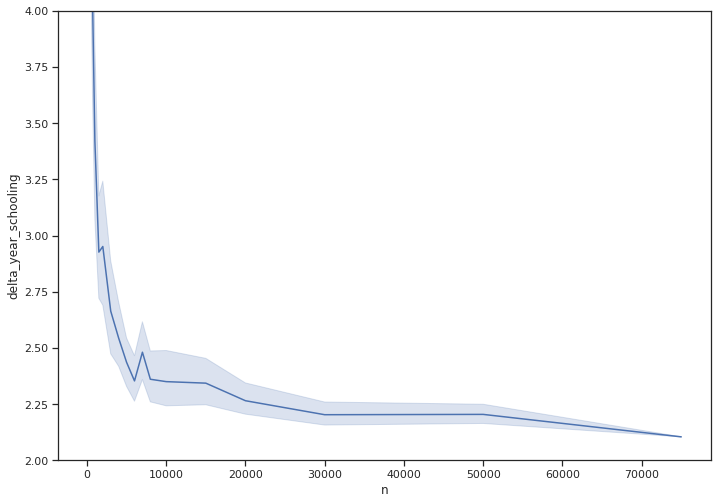

In [54]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
ax = sns.lineplot(x="n", y="delta_year_schooling", data=dfff, ax=ax)
ax.set_ylim(2, 4)

# Polynomial Regression

In [57]:
from src.model_code.polynomialregression import PolynomialRegression

In [58]:
pr = PolynomialRegression()

In [59]:
pr = pr.fit(X, y, degree=2)

In [60]:
residuals = y - pr.predict(X)

In [61]:
residuals_test = ytest - pr.predict(Xtest)

In [64]:
import numpy as np
np.abs(residuals_test).mean()

0.005754375917955264

# Boosting

## XGBoost

In [43]:
import xgboost as xgb

In [44]:
dtrain = xgb.DMatrix(X, label=residuals)
dtest = xgb.DMatrix(Xtest, label=residuals_test)

In [45]:
params = {
    # Hyper parameters
    'max_depth': 5,
    'min_child_weight': 1,
    'eta': 0.1,
    'subsample': 1,
    'colsample_bytree': 1,
    'n_estimators': 2000,
    # Other parameters
    'objective':'reg:squarederror',
}

params['eval_metric'] = 'mae'
num_boost_round = 5000

In [46]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=50
)

[0]	Test-mae:0.450095
Will train until Test-mae hasn't improved in 50 rounds.
[1]	Test-mae:0.405084
[2]	Test-mae:0.364574
[3]	Test-mae:0.328116
[4]	Test-mae:0.295302
[5]	Test-mae:0.26577
[6]	Test-mae:0.239192
[7]	Test-mae:0.215271
[8]	Test-mae:0.193742
[9]	Test-mae:0.174366
[10]	Test-mae:0.156928
[11]	Test-mae:0.141234
[12]	Test-mae:0.127108
[13]	Test-mae:0.114396
[14]	Test-mae:0.102954
[15]	Test-mae:0.092657
[16]	Test-mae:0.08339
[17]	Test-mae:0.075049
[18]	Test-mae:0.067542
[19]	Test-mae:0.060787
[20]	Test-mae:0.054707
[21]	Test-mae:0.049235
[22]	Test-mae:0.044311
[23]	Test-mae:0.039879
[24]	Test-mae:0.03589
[25]	Test-mae:0.032299
[26]	Test-mae:0.029069
[27]	Test-mae:0.026163
[28]	Test-mae:0.023548
[29]	Test-mae:0.021198
[30]	Test-mae:0.019088
[31]	Test-mae:0.017201
[32]	Test-mae:0.015521
[33]	Test-mae:0.014035
[34]	Test-mae:0.012728
[35]	Test-mae:0.011591
[36]	Test-mae:0.010608
[37]	Test-mae:0.00977
[38]	Test-mae:0.00906
[39]	Test-mae:0.008462
[40]	Test-mae:0.007962
[41]	Test-mae:0.

In [99]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=1,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10,
)

In [100]:
cv_results

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,0.045535,0.000066,0.045631,0.000219
1,0.040540,0.000652,0.040642,0.000702
2,0.038364,0.000567,0.038484,0.000637
3,0.037102,0.000661,0.037273,0.000705
4,0.036181,0.000697,0.036380,0.000761
...,...,...,...,...
3059,0.006335,0.000127,0.009999,0.000202
3060,0.006334,0.000127,0.009999,0.000202
3061,0.006333,0.000128,0.009999,0.000202
3062,0.006332,0.000127,0.009999,0.000202


In [9]:
# XGBOOST

In [45]:
import xgboost

In [82]:
xgb = xgboost.XGBRegressor(
    max_depth=2,
    learning_rate=1,
    n_estimators=2000,
    objective='reg:squarederror',
    n_jobs=4,
)

In [83]:
xgb = xgb.fit(X, y)

In [84]:
ypred = xgb.predict(Xtest)

In [123]:
mean_absolute_error(ytest, ypred)

0.06330016845966631

# Gaussain Process Regression

## Sci-kit learn

In [109]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [110]:
gpr = GaussianProcessRegressor()

In [111]:
gpr = gpr.fit(X, y)

In [20]:
ypred = gpr.predict(Xtest)

In [21]:
ypred.shape

(10,)

In [112]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
noise = 0.4
rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=rbf, alpha=noise**2)

In [113]:
gpr = gpr.fit(X, y)

In [114]:
ypred = gpr.predict(Xtest.values)

In [118]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel


In [119]:
kernel = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)

In [120]:
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)

In [121]:
gp.fit(X, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 + Matern(length_scale=2, nu=1.5) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [122]:
ypred = gp.predict(Xtest)

## GPyTorch

In [65]:
import math
import torch
import gpytorch
from matplotlib import pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
train_x = torch.from_numpy(X.values).float()
train_y = torch.from_numpy(residuals).float()

In [67]:
test_x = torch.from_numpy(Xtest.values).float()

In [68]:
# We will use the simplest form of GP model, exact inference
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# initialize likelihood and model
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_x, train_y, likelihood)

In [69]:
training_iter = 50
# Find optimal model hyperparameters
model.train()
likelihood.train()

# Use the adam optimizer
optimizer = torch.optim.Adam([
    {'params': model.parameters()},  # Includes GaussianLikelihood parameters
], lr=0.1)

# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

for i in range(training_iter):
    # Zero gradients from previous iteration
    optimizer.zero_grad()
    # Output from model
    output = model(train_x)
    # Calc loss and backprop gradients
    loss = -mll(output, train_y)
    loss.backward()
    print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (
        i + 1, training_iter, loss.item(),
        model.covar_module.base_kernel.lengthscale.item(),
        model.likelihood.noise.item()
    ))
    optimizer.step()

Iter 1/50 - Loss: 1.082   lengthscale: 0.693   noise: 0.693
Iter 2/50 - Loss: 1.050   lengthscale: 0.693   noise: 0.644
Iter 3/50 - Loss: 1.009   lengthscale: 0.693   noise: 0.598
Iter 4/50 - Loss: 0.972   lengthscale: 0.693   noise: 0.554
Iter 5/50 - Loss: 0.934   lengthscale: 0.693   noise: 0.513
Iter 6/50 - Loss: 0.894   lengthscale: 0.693   noise: 0.474
Iter 7/50 - Loss: 0.852   lengthscale: 0.693   noise: 0.437
Iter 8/50 - Loss: 0.811   lengthscale: 0.693   noise: 0.403
Iter 9/50 - Loss: 0.770   lengthscale: 0.693   noise: 0.370
Iter 10/50 - Loss: 0.728   lengthscale: 0.693   noise: 0.340
Iter 11/50 - Loss: 0.683   lengthscale: 0.693   noise: 0.312
Iter 12/50 - Loss: 0.639   lengthscale: 0.693   noise: 0.286
Iter 13/50 - Loss: 0.595   lengthscale: 0.693   noise: 0.261
Iter 14/50 - Loss: 0.551   lengthscale: 0.693   noise: 0.239
Iter 15/50 - Loss: 0.504   lengthscale: 0.693   noise: 0.218
Iter 16/50 - Loss: 0.457   lengthscale: 0.693   noise: 0.199
Iter 17/50 - Loss: 0.411   length

In [70]:
# Get into evaluation (predictive posterior) mode
model.eval()
likelihood.eval()

# Test points are regularly spaced along [0,1]
# Make predictions by feeding model through likelihood
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    f_pred = model(test_x)
    y_pred = likelihood(f_pred)

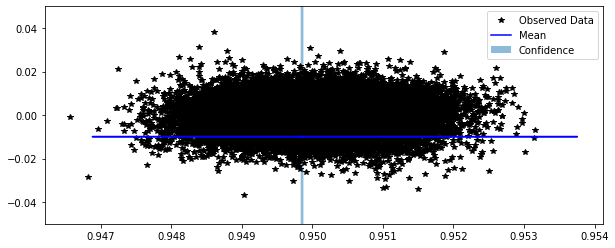

In [76]:
with torch.no_grad():
    # Initialize plot
    f, ax = plt.subplots(1, 1, figsize=(10, 4))

    # Get upper and lower confidence bounds
    lower, upper = y_pred.confidence_region()
    # Plot training data as black stars
    ax.plot(train_x[:, 0].numpy(), train_y.numpy(), 'k*')
    # Plot predictive means as blue line
    ax.plot(test_x[:, 0].numpy(), y_pred.mean.numpy(), 'b')
    # Shade between the lower and upper confidence bounds
    ax.fill_between(test_x[:, 0].numpy(), lower.numpy(), upper.numpy(), alpha=0.5)
    ax.set_ylim([-0.0IMPORT 5, 0.05])
    ax.legend(['Observed Data', 'Mean', 'Confidence'])

## GPFlow

In [14]:
import gpflow
import numpy as np
import matplotlib
from gpflow.utilities import print_summary
import itertools
import numpy.random as rnd
import time
import tensorflow as tf
from gpflow.ci_utils import ci_niter

In [15]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt = matplotlib.pyplot
plt.style.use('ggplot')

In [16]:
XX = np.array(X)
yy = np.array(y)
yy = yy.reshape(-1, 1)

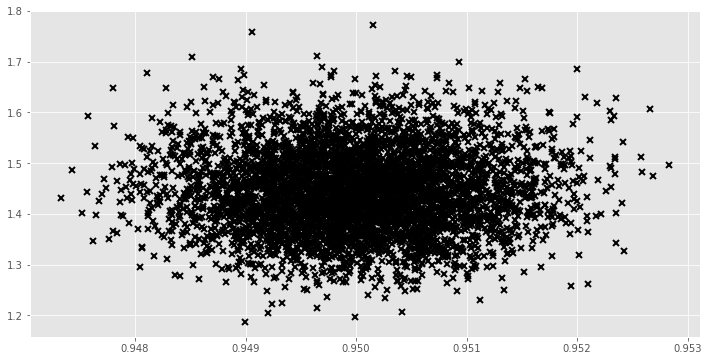

In [17]:
plt.plot(XX[:, :1], y, 'kx', mew=2);

In [82]:
k = gpflow.kernels.Matern52()

In [83]:
m = gpflow.models.GPR(
    data=(XX, yy),
    kernel=k,
    mean_function=None
)

In [84]:
opt = gpflow.optimizers.Scipy()

In [ ]:
def objective_closure():
    return - m.log_marginal_likelihood()

opt_logs = opt.minimize(objective_closure,
                        m.trainable_variables,
                        options=dict(maxiter=100))
print_summary(m)

In [76]:
ypred, _  = m.predict_f(Xtest.values)

In [10]:
M = 50

kernel = gpflow.kernels.SquaredExponential()
Z = XX[:M, :].copy()

m = gpflow.models.SVGP(
    kernel,
    gpflow.likelihoods.Gaussian(),
    Z,
    num_data=nobs
)

In [18]:
log_likelihood = tf.function(autograph=False)(m.log_likelihood)

In [19]:
data = (XX, yy)

In [22]:
%%timeit
log_likelihood(XX, yy)

9.19 ms ± 725 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
minibatch_size = 100

train_dataset = tf.data.Dataset.from_tensor_slices((XX, yy)) \
    .repeat() \
    .shuffle(nobs)

train_it = iter(train_dataset.batch(minibatch_size))

ground_truth = m.log_likelihood(XX, yy).numpy()

In [28]:
evals = [log_likelihood(minibatch).numpy()
         for minibatch in itertools.islice(train_it, 100)]

TypeError: log_likelihood() missing 1 required positional argument: 'Y'

In [77]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(ytest, ypred)

1.4454178

# TODO:

## 1. Model:

1. Fit Polynomial OLS on data
2. Fit GP on residuals

## 2. Num Obs:

1. Fit Polynomial for varying number of observations
2. Implement LASSO and Ridge Regression for polyonimal setting and do 1.

# Ridge Regression

In [4]:
Xtest, ytest = load_testing_data()

In [5]:
X, y = load_training_data(nobs=10000, seed=1)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
scaler = scaler.fit(X)

In [10]:
X_ = scaler.transform(X)

In [12]:
scaler.mean_

array([ 9.49989708e-01,  9.20988403e+00,  3.80048394e-02,  3.30083493e-02,
       -5.00197323e-04,  1.08681543e-07, -1.47450904e-07,  8.48012594e+00,
        6.99956162e-02,  6.69899231e-02, -9.99707738e-04,  2.20049595e-02,
       -5.00386933e-04,  6.16040998e+00, -6.91519589e-01, -3.99912944e+03,
        1.77398044e+04,  2.00017565e-01, -8.31360442e-06,  2.49992344e-01,
        2.07979134e+00,  1.17508875e+00,  1.50057905e+03, -6.29196713e+00,
       -2.89056134e+00, -1.46915017e+00,  1.50246901e+03])

In [13]:
scaler.scale_

array([8.31354049e-04, 1.26905288e-02, 1.14135546e-03, 4.39207064e-04,
       1.26295757e-05, 6.77883149e-04, 2.89034243e-05, 7.66314844e-03,
       4.73787363e-04, 5.52223401e-04, 1.65932037e-05, 3.35643307e-04,
       2.09241185e-05, 3.31190328e+02, 1.56286365e+02, 2.02072612e+02,
       3.86559202e+02, 1.46796659e-03, 6.39418615e-03, 1.31157349e-03,
       1.44066282e+02, 1.16053935e+02, 1.08957884e+02, 2.29310942e+02,
       1.29076705e+02, 1.76926187e+02, 1.70548928e+02])

In [14]:
s = StandardScaler()

In [22]:
s = s.set_params(with_mean=scaler.mean_, with_std=scaler.scale_)

In [23]:
s.transform(X)

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [19]:
s.get_params().keys()

dict_keys(['copy', 'with_mean', 'with_std'])

In [23]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [14]:
lr = LinearRegression()
lr.fit(X, y)

y_pred_lr = lr.predict(Xtest)

mae_lr = mean_absolute_error(ytest, y_pred_lr)

In [15]:
mae_lr

0.008342915910848653

In [19]:
rr = Ridge(alpha=0.01)
rr.fit(X, y)

y_pred_rr = rr.predict(Xtest)

mae_rr = mean_absolute_error(ytest, y_pred_rr)

In [20]:
mae_rr

0.0244259004538749

In [21]:
lar = Lasso(alpha=0.01)
lar.fit(X, y)

y_pred_lar = lar.predict(Xtest)

mae_lar = mean_absolute_error(ytest, y_pred_lar)

In [22]:
mae_lar

0.0321889596473073

In [24]:
from sklearn.linear_model import RidgeCV

In [31]:
alphas = np.logspace(-5, 1, 25)

In [33]:
rrcv = RidgeCV(alphas)

In [34]:
rrcv.fit(X, y)

RidgeCV(alphas=array([1.00000000e-05, 1.77827941e-05, 3.16227766e-05, 5.62341325e-05,
       1.00000000e-04, 1.77827941e-04, 3.16227766e-04, 5.62341325e-04,
       1.00000000e-03, 1.77827941e-03, 3.16227766e-03, 5.62341325e-03,
       1.00000000e-02, 1.77827941e-02, 3.16227766e-02, 5.62341325e-02,
       1.00000000e-01, 1.77827941e-01, 3.16227766e-01, 5.62341325e-01,
       1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
       1.00000000e+01]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [35]:
y_pred_rrcv = rrcv.predict(Xtest)

In [36]:
mean_absolute_error(ytest, y_pred_rrcv)

0.014415460469602926

1e-05

### Ridge Regression on Polynomial Features

In [6]:
from src.model_code.ridgeregression import RidgeRegression

In [7]:
rr = RidgeRegression()

In [3]:
X, y = load_training_data(nobs=10000, seed=1)

In [9]:
rr = rr.fit(X, y, degree=2)

In [10]:
Xtest, ytest = load_testing_data()

In [11]:
from sklearn.metrics import mean_absolute_error

In [30]:
ypred = rr.predict(Xtest, threshold=0.0000000001)

In [31]:
mean_absolute_error(ytest, ypred)

0.005834130398135698